#Coding Assignment 8

###*Feature Scaling*



###*Author: Sreehari Sreenath*
Ref: https://www.kaggle.com/uciml/pima-indians-diabetes-database 

In [ ]:
# Importing the libraries 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score,roc_curve
from sklearn.metrics import precision_score,recall_score,f1_score,roc_auc_score
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import MaxAbsScaler
from sklearn.preprocessing import StandardScaler

##Load File

In [ ]:
# Importing the dataset
dataset = pd.read_csv('/content/sample_data/pima-indians-diabetes.csv') 

##Understanding the data



In [ ]:
print(dataset.describe())
print(dataset.info())
print(dataset.shape)

         pregnant  plasma_glucose  ...         age        Diab
count  768.000000      768.000000  ...  768.000000  768.000000
mean     3.845052      120.894531  ...   33.240885    0.348958
std      3.369578       31.972618  ...   11.760232    0.476951
min      0.000000        0.000000  ...   21.000000    0.000000
25%      1.000000       99.000000  ...   24.000000    0.000000
50%      3.000000      117.000000  ...   29.000000    0.000000
75%      6.000000      140.250000  ...   41.000000    1.000000
max     17.000000      199.000000  ...   81.000000    1.000000

[8 rows x 9 columns]
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   pregnant        768 non-null    int64  
 1   plasma_glucose  768 non-null    int64  
 2   dia_BP          768 non-null    int64  
 3   skin_thickness  768 non-null    int64  
 4   serum_insulin   768 non-null    

### Cleaning up the data

In [ ]:
#Checking for the missing entries
All_featureset = ['pregnant','plasma_glucose','dia_BP','skin_thickness','serum_insulin','bmi','diab_pedigree','age'] 
for feature in All_featureset:
  print("Missing entries in '{}': {}".format(feature,len(dataset.loc[dataset[feature] == 0])))

#removing rows with missing entries
dataset[All_featureset] = dataset[All_featureset].replace(0, np.nan)
dataset.dropna(inplace=True)

print(dataset.shape)

Missing entries in 'pregnant': 111
Missing entries in 'plasma_glucose': 5
Missing entries in 'dia_BP': 35
Missing entries in 'skin_thickness': 227
Missing entries in 'serum_insulin': 374
Missing entries in 'bmi': 11
Missing entries in 'diab_pedigree': 0
Missing entries in 'age': 0
(336, 9)


### Getting the correlation between each feature in the dataset
[Reference link for heatmap generation](https://heartbeat.fritz.ai/seaborn-heatmaps-13-ways-to-customize-correlation-matrix-visualizations-f1c49c816f07)

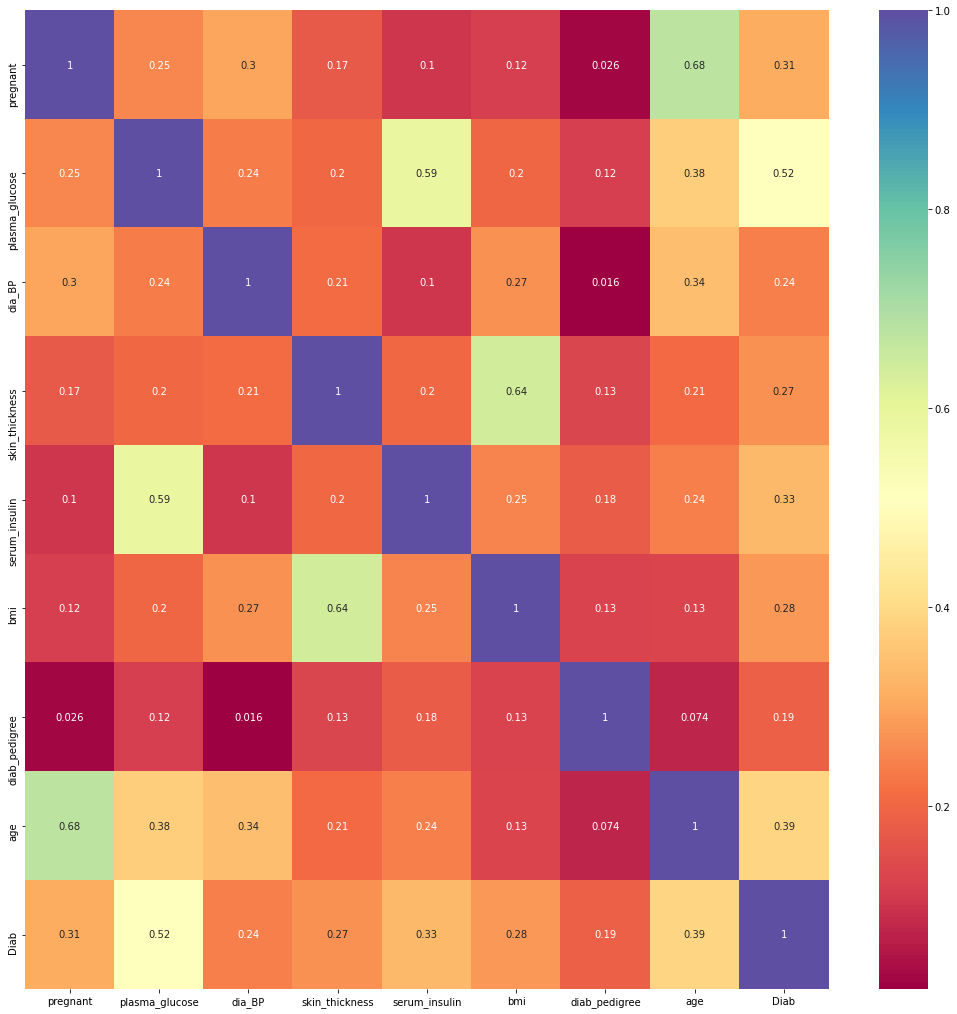

In [ ]:
correlation_matrix = dataset.corr()
top_corr_features = correlation_matrix.index
plt.figure(figsize=(18,18))
#plot heat map
Heat_map = sns.heatmap(dataset[top_corr_features].corr(),annot=True,cmap="Spectral")

### Performing the train test split

In [ ]:
X = dataset[['pregnant','plasma_glucose','age']].values
y = dataset[['Diab']].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)


### Categorizing the data as Raw(R), Normalized(N) and Standardized(S) 

#### Creating the Raw Data

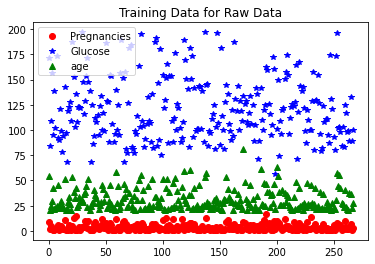

In [ ]:
R_X_train = X_train
R_X_test = X_test
# Visualizing the training data 
plt.figure()
plt.plot(R_X_train[:, 0], marker = 'o', color = 'red', linestyle=' ', label = 'Pregnancies')
plt.plot(R_X_train[:, 1], marker = '*', color = 'blue', linestyle=' ', label = 'Glucose')
plt.plot(R_X_train[:, 2], marker = '^', color = 'green', linestyle=' ', label = 'age')
plt.title("Training Data for Raw Data")
plt.legend()
plt.show()


#### Creating the Normalied(N) Data

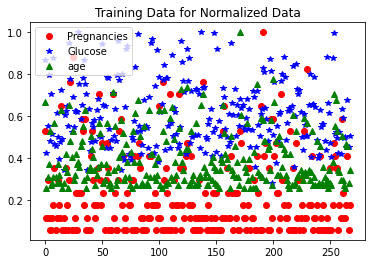

In [ ]:
normalizer = MaxAbsScaler()
N_X_train = normalizer.fit_transform(X_train)
N_X_test = normalizer.fit_transform(X_test)

# Visualizing the training data 
plt.figure()
plt.plot(N_X_train[:, 0], marker = 'o', color = 'red', linestyle=' ', label = 'Pregnancies')
plt.plot(N_X_train[:, 1], marker = '*', color = 'blue', linestyle=' ', label = 'Glucose')
plt.plot(N_X_train[:, 2], marker = '^', color = 'green', linestyle=' ', label = 'age')
plt.title("Training Data for Normalized Data")
plt.legend()
plt.show()


#### Creating the Standardized(S) Data

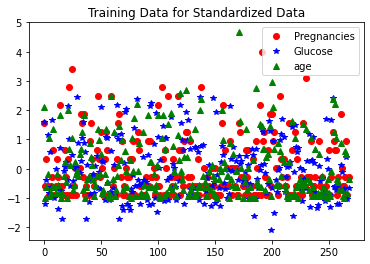

In [ ]:
scaler = StandardScaler()
S_X_train = scaler.fit_transform(X_train)
S_X_test = scaler.fit_transform(X_test)

# Visualizing the training data 
plt.figure()
plt.plot(S_X_train[:, 0], marker = 'o', color = 'red', linestyle=' ', label = 'Pregnancies')
plt.plot(S_X_train[:, 1], marker = '*', color = 'blue', linestyle=' ', label = 'Glucose')
plt.plot(S_X_train[:, 2], marker = '^', color = 'green', linestyle=' ', label = 'age')
plt.title("Training Data for Standardized Data")
plt.legend()
plt.show()


## Calculating the required Metrics

### Creating a function to print the metrics

In [ ]:
def PrintMet(model, test, predict):
  Confusion_matrix = confusion_matrix(test, predict)
  print('confusion_matrix for {} :'.format(model)) 
  print(Confusion_matrix)
  
  # accuracy: (tp + tn) / (p + n)
  accuracy = accuracy_score(test, predict)
  print('Accuracy for {} : {:.2f}'.format(model, accuracy))
  
  # precision tp / (tp + fp)
  precision = precision_score(test, predict)
  print('Precision for {} : {:.2f}'.format(model,precision))
  
  # recall: tp / (tp + fn)
  recall = recall_score(test, predict)
  print('Recall for {} : {:.2f}'.format(model,recall))
  
  # f1: 2 tp / (2 tp + fp + fn)
  f1 = f1_score(test, predict)
  print('F1 score for {}  : {:.2f}'.format(model,f1))

  AUROC = roc_auc_score(test, predict)
  print('AUROC for {}  : {:.2f}\n\n'.format(model,AUROC))

In [ ]:
def GenerateMet(TypeOfData,X_train, X_test, y_train, y_test):
  
  #Creating a SVM classifier with 'linear' kernel
  Linear_clf = svm.SVC(kernel='linear') # Linear Kernel
  #Train the model using the training sets
  Linear_clf.fit(X_train, y_train.ravel())
  #Predict the response for test dataset
  y_predict_Linear = Linear_clf.predict(X_test)

  #Creating a SVM classifier with radial basis function kernel
  Rbf_clf = svm.SVC(kernel='rbf') # rbf Kernel
  #Train the model using the training sets
  Rbf_clf.fit(X_train, y_train.ravel())
  #Predict the response for test dataset
  y_predict_rbf = Rbf_clf.predict(X_test)

  #Creating a SVM classifier with Polynomial kernel
  Poly_clf = svm.SVC(kernel='poly') # poly Kernel
  #Train the model using the training sets
  Poly_clf.fit(X_train, y_train.ravel())
  #Predict the response for test dataset
  y_predict_poly = Poly_clf.predict(X_test)

  #Creating a Logistic Regression model
  logreg = LogisticRegression()
  #Train the model using the training sets
  logreg.fit(X_train, y_train.ravel())
  #Predict the response for test dataset
  y_pred_LR = logreg.predict(X_test)

  #Printing the metrics
  print(TypeOfData)
  PrintMet("Logistic Regression", y_test, y_pred_LR)
  PrintMet("SVM Linear kernel", y_test, y_predict_Linear)
  PrintMet("SVM Rbf kernel", y_test, y_predict_rbf)
  PrintMet("SVM Polynomial kernel", y_test, y_predict_poly)

### Calculating metrics for Raw Data 

In [ ]:
GenerateMet("Raw Data", R_X_train, R_X_test, y_train, y_test)

Raw Data
confusion_matrix for Logistic Regression :
[[35  5]
 [14 14]]
Accuracy for Logistic Regression : 0.72
Precision for Logistic Regression : 0.74
Recall for Logistic Regression : 0.50
F1 score for Logistic Regression  : 0.60
AUROC for Logistic Regression  : 0.69


confusion_matrix for SVM Linear kernel :
[[35  5]
 [14 14]]
Accuracy for SVM Linear kernel : 0.72
Precision for SVM Linear kernel : 0.74
Recall for SVM Linear kernel : 0.50
F1 score for SVM Linear kernel  : 0.60
AUROC for SVM Linear kernel  : 0.69


confusion_matrix for SVM Rbf kernel :
[[37  3]
 [12 16]]
Accuracy for SVM Rbf kernel : 0.78
Precision for SVM Rbf kernel : 0.84
Recall for SVM Rbf kernel : 0.57
F1 score for SVM Rbf kernel  : 0.68
AUROC for SVM Rbf kernel  : 0.75


confusion_matrix for SVM Polynomial kernel :
[[36  4]
 [14 14]]
Accuracy for SVM Polynomial kernel : 0.74
Precision for SVM Polynomial kernel : 0.78
Recall for SVM Polynomial kernel : 0.50
F1 score for SVM Polynomial kernel  : 0.61
AUROC for SVM P

### Calculating metrics for Normalized Data 

In [ ]:
GenerateMet("Normalized Data", N_X_train, N_X_test, y_train, y_test)

Normalized Data
confusion_matrix for Logistic Regression :
[[34  6]
 [13 15]]
Accuracy for Logistic Regression : 0.72
Precision for Logistic Regression : 0.71
Recall for Logistic Regression : 0.54
F1 score for Logistic Regression  : 0.61
AUROC for Logistic Regression  : 0.69


confusion_matrix for SVM Linear kernel :
[[33  7]
 [11 17]]
Accuracy for SVM Linear kernel : 0.74
Precision for SVM Linear kernel : 0.71
Recall for SVM Linear kernel : 0.61
F1 score for SVM Linear kernel  : 0.65
AUROC for SVM Linear kernel  : 0.72


confusion_matrix for SVM Rbf kernel :
[[33  7]
 [11 17]]
Accuracy for SVM Rbf kernel : 0.74
Precision for SVM Rbf kernel : 0.71
Recall for SVM Rbf kernel : 0.61
F1 score for SVM Rbf kernel  : 0.65
AUROC for SVM Rbf kernel  : 0.72


confusion_matrix for SVM Polynomial kernel :
[[32  8]
 [ 8 20]]
Accuracy for SVM Polynomial kernel : 0.76
Precision for SVM Polynomial kernel : 0.71
Recall for SVM Polynomial kernel : 0.71
F1 score for SVM Polynomial kernel  : 0.71
AUROC fo

### Calculating metrics for Standardized Data 



In [ ]:
GenerateMet("Standardized Data", S_X_train, S_X_test, y_train, y_test)

Standardized Data
confusion_matrix for Logistic Regression :
[[36  4]
 [15 13]]
Accuracy for Logistic Regression : 0.72
Precision for Logistic Regression : 0.76
Recall for Logistic Regression : 0.46
F1 score for Logistic Regression  : 0.58
AUROC for Logistic Regression  : 0.68


confusion_matrix for SVM Linear kernel :
[[35  5]
 [13 15]]
Accuracy for SVM Linear kernel : 0.74
Precision for SVM Linear kernel : 0.75
Recall for SVM Linear kernel : 0.54
F1 score for SVM Linear kernel  : 0.63
AUROC for SVM Linear kernel  : 0.71


confusion_matrix for SVM Rbf kernel :
[[36  4]
 [15 13]]
Accuracy for SVM Rbf kernel : 0.72
Precision for SVM Rbf kernel : 0.76
Recall for SVM Rbf kernel : 0.46
F1 score for SVM Rbf kernel  : 0.58
AUROC for SVM Rbf kernel  : 0.68


confusion_matrix for SVM Polynomial kernel :
[[39  1]
 [20  8]]
Accuracy for SVM Polynomial kernel : 0.69
Precision for SVM Polynomial kernel : 0.89
Recall for SVM Polynomial kernel : 0.29
F1 score for SVM Polynomial kernel  : 0.43
AUROC 